In [25]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [26]:
# 股價算術平均
def asian_option_simulation(S0, K, T, r, sigma, n, m):
    dt = T / n
    nudt = (r - 0.5 * sigma**2) * dt
    sigsdt = sigma * np.sqrt(dt)
    sum_payoff = 0
    np.random.seed(1234)
    for i in range(m):
        S = S0
        average_S = S0

        for j in range(n):
            epsilon = np.random.normal(0, 1)
            S *= np.exp(nudt + sigsdt * epsilon)
            average_S += S

        average_S /= (n + 1)
        payoff = max(average_S - K, 0)
        sum_payoff += payoff

    option_price = np.exp(-r * T) * (sum_payoff / m)
    return option_price

In [27]:
# 股價幾何平均
def asian_option_simulation_geometric_average(S0, K, T, r, sigma, n, m):
    dt = T / n
    nudt = (r - 0.5 * sigma**2) * dt
    sigsdt = sigma * np.sqrt(dt)
    sum_payoff = 0
    np.random.seed(1234)
    for i in range(m):
        S = S0
        geometric_average_S = S0

        for j in range(n):
            epsilon = np.random.normal(0, 1)
            S *= np.exp(nudt + sigsdt * epsilon)
            geometric_average_S *= S

        geometric_average_S = geometric_average_S ** (1 / (n + 1))
        payoff = max(geometric_average_S - K, 0)
        sum_payoff += payoff

    option_price = np.exp(-r * T) * (sum_payoff / m)
    return option_price

In [28]:
def asian_option_average_strike_simulation(S0, K, T, r, sigma, n, m):
    dt = T / n
    nudt = (r - 0.5 * sigma**2) * dt
    sigsdt = sigma * np.sqrt(dt)
    sum_strike = 0
    np.random.seed(1234)
    for i in range(m):
        S = S0
        average_strike = 0

        for j in range(n):
            epsilon = np.random.normal(0, 1)
            S *= np.exp(nudt + sigsdt * epsilon)
            average_strike += K

        average_strike /= (n + 1)
        payoff = max(average_strike - S, 0)
        sum_strike += payoff

    option_price = np.exp(-r * T) * (sum_strike / m)
    return option_price

In [29]:
import numpy as np
from scipy.stats import norm

def asian_option_closed_form(S0, K, T, r, sigma, n, option_type='call'):
    """
    使用封閉解公式計算亞式選擇權的價格

    :param S0: 初始資產價格
    :param K: 選擇權行使價格
    :param T: 選擇權到期日
    :param r: 無風險利率
    :param sigma: 波動率
    :param n: 每期分割的次數
    :param option_type: 選擇權類型，可以是'call'或'put'
    :return: 亞式選擇權的價格估計
    """
    sigma_G = sigma / np.sqrt(3)
    b = (r - 0.5 * sigma_G**2)
    sqrt_T = np.sqrt(T)
    d1 = (np.log(S0 / K) + (b + 0.5 * sigma_G**2) * T) / (sigma_G * sqrt_T)
    d2 = d1 - sigma_G * sqrt_T

    if option_type == 'call':
        option_price = (S0 * np.exp((b - r) * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))
    else:
        option_price = (K * np.exp(-r * T) * norm.cdf(-d2) - S0 * np.exp((b - r) * T) * norm.cdf(-d1))

    return option_price

# 設定模擬參數
S0 = 100  # 初始資產價格
K = 100  # 選擇權行使價格
T = 1  # 選擇權到期日
r = 0.05  # 無風險利率
sigma = 0.2  # 波動率
n = 50  # 每期分割的次數

# 使用封閉解公式計算亞式選擇權價格（假設為Call選擇權）
option_price = asian_option_closed_form(S0, K, T, r, sigma, n, option_type='call')
print(f'亞式選擇權價格（Call）：{option_price:.4f}')

亞式選擇權價格（Call）：6.8939


In [30]:
# 設定模擬參數
S0 = 100  # 初始資產價格
K = 100  # 選擇權行使價格
T = 1  # 選擇權到期日
r = 0.05  # 無風險利率
sigma = 0.2  # 波動率
n = 50  # 每期分割的次數
m = 10000  # 模擬的次數

option_price = asian_option_simulation(S0, K, T, r, sigma, n, m)
print("股價算術平均亞式選擇權價格估計：", option_price)

option_price = asian_option_average_strike_simulation(S0, K, T, r, sigma, n, m)
print("履約價算術平均亞式選擇權的履約價的平均估計：", option_price)

option_price = asian_option_simulation_geometric_average(S0, K, T, r, sigma, n, m)
print("股價幾何平均亞式選擇權價格估計：", option_price)

股價算術平均亞式選擇權價格估計： 5.84251765457542
履約價算術平均亞式選擇權的履約價的平均估計： 4.830540339450241
股價幾何平均亞式選擇權價格估計： 5.618032188348073


In [113]:
# 股價幾何平均路徑模擬，考慮 K 時間價值
def asian_option_average_price_path_simulation(S0, K, T, r, sigma, n, m):
    """
    :param S0: 初始資產價格
    :param K: 選擇權行使價格
    :param T: 選擇權到期日
    :param r: 無風險利率
    :param sigma: 波動率
    :param n: 每期分割的次數
    :param m: 模擬的次數
    :return: 亞式選擇權的價值路徑模擬
    """
    dt = T / n
    nudt = (r - 0.5 * sigma**2) * dt
    sigsdt = sigma * np.sqrt(dt)
    price_paths = []
    # np.random.seed(1234)
    for i in range(m):
        S = S0
        average_price = S0
        price_path = [average_price]

        for j in range(n):
            average_price =  (average_price ** j * S) ** (1 / (j + 1))

            epsilon = np.random.normal(0, 1)
            S *= np.exp(nudt + sigsdt * epsilon)

            price_path.append(average_price)
            # 確認S 與 K 在 t 時點價值時否正確
            # print(average_price, K * np.exp(-r * (n - j) * dt))

        # option_value = max(average_price - K, 0)
        price_path = [max(avg_price - K * np.exp(-r * (n - j) * dt), 0) for avg_price in price_path]
        price_paths.append(price_path)
        print(price_path)


    return price_paths

# 設定模擬參數
S0 = 100  # 初始資產價格
K = 100  # 選擇權行使價格
T = 1  # 選擇權到期日
r = 0.05  # 無風險利率
sigma = 0.2  # 波動率
n = 50  # 每期分割的次數
m = 2  # 模擬的次數

price_paths = asian_option_average_price_path_simulation(S0, K, T, r, sigma, n, m)

# 繪製價值路徑
# for i, price_path in enumerate(price_paths):
#     plt.plot(np.arange(0, T + T / n, T / n), price_path, label=f'Simulation {i + 1}')

# plt.xlabel('Time')
# plt.ylabel('Option Value')
# plt.title('Asian Option Value Paths Simulation')
# plt.legend()
# plt.show()

[0.09995001666250403, 0.09995001666250403, 0.1430577754566258, 0.8549149858573912, 1.1146816553473258, 0.4354096832248189, 0.518317621925334, 0.5279335449788363, 0.009325177915130212, 0, 0, 0, 0, 0, 0.2222670917017524, 0.512788375697383, 1.0077954059853624, 1.456471815172094, 1.8185848276797145, 2.1343333071180126, 2.356731931097926, 2.4564185238202896, 2.637722036578893, 2.9673967142296362, 3.2809741735228783, 3.603273775050411, 3.9328957925729924, 4.224072958414197, 4.487367064861971, 4.6738564737755866, 4.675429621992649, 4.700891106579988, 4.77994102982089, 4.8394158288166125, 5.029480932267717, 5.220119459237807, 5.29782621404398, 5.444077149647782, 5.5110834392593375, 5.513907775430113, 5.513722525165889, 5.500163449800354, 5.458281037025529, 5.43212519204684, 5.375866558773964, 5.293755683901864, 5.135604265818927, 5.114612064714649, 5.109241938389999, 5.050232261784046, 5.061533551285834]
[0.09995001666250403, 0.09995001666250403, 0, 0.5502487883412499, 0.09116882283606742, 0.5

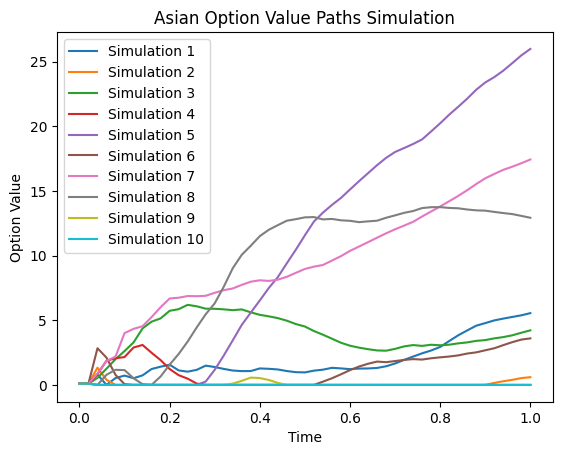

In [32]:
# 股價算數平均路徑模擬，考慮 K 時間價值
def asian_option_average_price_path_simulation(S0, K, T, r, sigma, n, m):
    """
    :param S0: 初始資產價格
    :param K: 選擇權行使價格
    :param T: 選擇權到期日
    :param r: 無風險利率
    :param sigma: 波動率
    :param n: 每期分割的次數
    :param m: 模擬的次數
    :return: 亞式選擇權的價值路徑模擬
    """
    dt = T / n
    nudt = (r - 0.5 * sigma**2) * dt
    sigsdt = sigma * np.sqrt(dt)
    price_paths = []
    np.random.seed(1234)
    for i in range(m):
        S = S0
        average_price = S0
        price_path = [average_price]

        for j in range(n):
            average_price = (average_price * j + S) / (j + 1)

            epsilon = np.random.normal(0, 1)
            S *= np.exp(nudt + sigsdt * epsilon)

            price_path.append(average_price)
            # 確認S 與 K 在 t 時點價值時否正確
            # print(average_price, K * np.exp(-r * (n - j) * dt))

        # option_value = max(average_price - K, 0)
        price_path = [max(avg_price - K * np.exp(-r * (n - j) * dt), 0) for avg_price in price_path]
        price_paths.append(price_path)


    return price_paths

# 設定模擬參數
S0 = 100  # 初始資產價格
K = 100  # 選擇權行使價格
T = 1  # 選擇權到期日
r = 0.05  # 無風險利率
sigma = 0.2  # 波動率
n = 50  # 每期分割的次數
m = 10  # 模擬的次數

price_paths = asian_option_average_price_path_simulation(S0, K, T, r, sigma, n, m)

# 繪製價值路徑
for i, price_path in enumerate(price_paths):
    plt.plot(np.arange(0, T + T / n, T / n), price_path, label=f'Simulation {i + 1}')

plt.xlabel('Time')
plt.ylabel('Option Value')
plt.title('Asian Option Value Paths Simulation')
plt.legend()
plt.show()

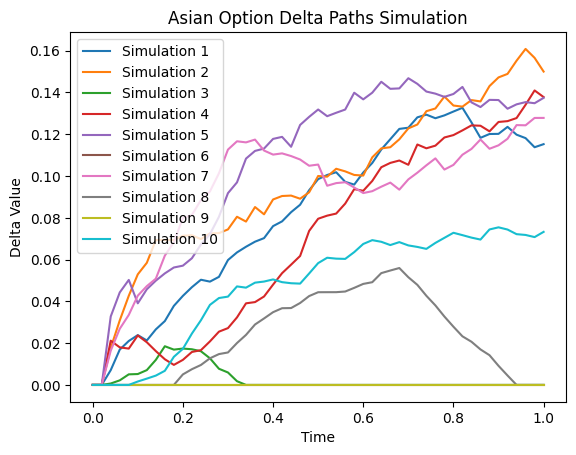

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def asian_option_delta_path_simulation(S0, K, T, r, sigma, n, m):
    """
    模擬亞式選擇權的Delta值路徑

    :param S0: 初始資產價格
    :param K: 選擇權行使價格
    :param T: 選擇權到期日
    :param r: 無風險利率
    :param sigma: 波動率
    :param n: 每期分割的次數
    :param m: 模擬的次數
    :return: 亞式選擇權的Delta值路徑模擬
    """
    dt = T / n
    nudt = (r - 0.5 * sigma**2) * dt
    sigsdt = sigma * np.sqrt(dt)
    delta_paths = []

    for i in range(m):
        S = S0
        average_price = S0
        delta_path = [0]  # 初始Delta值為0

        for j in range(n):
            average_price = (average_price ** j * S) ** (1 / (j + 1))

            epsilon = np.random.normal(0, 1)
            S *= np.exp(nudt + sigsdt * epsilon)

            # 計算Delta值
            delta = np.exp(-r * (n - j) * dt) * max(average_price - K, 0) / S
            delta_path.append(delta)

        delta_paths.append(delta_path)

    return delta_paths

# 設定模擬參數
S0 = 100  # 初始資產價格
K = 100  # 選擇權行使價格
T = 1  # 選擇權到期日
r = 0.05  # 無風險利率
sigma = 0.2  # 波動率
n = 50  # 每期分割的次數
m = 10  # 模擬的次數

delta_paths = asian_option_delta_path_simulation(S0, K, T, r, sigma, n, m)

# 繪製Delta值路徑
for i, delta_path in enumerate(delta_paths):
    time_points = np.arange(0, T + T / n, T / n)[:len(delta_path)]  # 確保時間點數量與Delta值數量一致
    plt.plot(time_points, delta_path, label=f'Simulation {i + 1}')

plt.xlabel('Time')
plt.ylabel('Delta Value')
plt.title('Asian Option Delta Paths Simulation')
plt.legend()
plt.show()
